In [8]:
import random

In [9]:
def adj(): return random.choice('蓝色的|黑色的|小小的|好看的'.split('|')).split()[0]

In [10]:
def adj_start(): 
    return random.choice([None,adj() + adj()])

In [17]:
adj_start()

'黑色的小小的'

In [171]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

def create_grammar(grammar, split='=>', line_split='\n'):
    newgrammar = {}
    for line in grammar.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        newgrammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return newgrammar

create_grammar(simple_grammar)

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [168]:
import random

simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

def create_grammar(grammar, split='=>', line_split='\n'):
    newgrammar = {}
    for line in grammar.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        newgrammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return newgrammar


rchoice=random.choice

def generate(gram,target):
    if target not in gram: return target  # 如果target为终结符（Terminal expression）
    expand=[generate(gram,t) for t in rchoice(gram[target])]
    return ''.join(e for e in expand if e!='null')

generate(gram=create_grammar(simple_grammar),target='sentence')
    

'这个女人听着一个小猫'

In [169]:
import random

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
乐子 = 赌博 | 飞镖
"""

def create_grammar(grammar, split='=', line_split='\n'):
    newgrammar = {}
    for line in grammar.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        newgrammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return newgrammar


rchoice=random.choice

def generate(gram,target):
    if target not in gram: return target  # 如果target为终结符（Terminal expression）
    expand=[generate(gram,t) for t in rchoice(gram[target])]
    return ''.join(e for e in expand if e!='null')

for i in range(10):
    print (generate(gram=create_grammar(host),target='host'))
    print (generate(gram=create_grammar(human),target='human'))

先生,你好我是7号,您需要喝酒吗？
我们想找点飞镖
您好我是582号,您需要打牌吗？
我想找点玩的
小朋友,您好我是2号,请问你要打牌吗？
俺找找玩的
女士,您好我是25851号,您需要喝酒吗？
俺找找飞镖
您好我是2号,您需要喝酒吗？
我们想找点赌博
小朋友,你好我是877号,您需要打牌吗？
俺找找玩的
小朋友,您好我是27号,您需要喝酒吗？
我们想找点赌博
你好我是7号,请问你要赌博吗？
我找找赌博
您好我是8号,请问你要喝酒吗？
我们找找玩的
小朋友,您好我是158号,请问你要喝酒吗？
我们找找赌博


## Language Model
$$ Language\_Model(Sting) = Probability(String) \in (0,1) $$
$$ P(w_1 w_2 w_3 w_4)=P(w_1 | w_2 w_3 w_4) * P(w_2 | w_3 w_4) * P(w_3 | w_4) * P(w_4) $$
$$可简化：P(w_1 w_2 w_3 w_4) \sim P(w_1 | w_2) * P(w_2 | w_3) * P(w_3 | w_4) * P(w_4) 假设w_n只与w_n+1相关$$

In [1]:
import pandas as pd

filename='d:/sqlResult_1558435.csv'

content=pd.read_csv(filename,encoding='gb18030')
content.head()
content['content']

0        此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1        骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2        此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3          这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4        （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...
5        　　受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...
6        虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...
7        　　沙漠雄鹰：震荡有利消化套牢筹码\r\n　　周四开盘上证50在银行券商大蓝筹带动下一度涨近...
8        （原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...
9        　　6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...
10       　　证券时报网（www.stcn.com）06月23日讯\r\n　　据上证报道，6月初以来，...
11       ?\r\n　　巨丰早评：市场将再次探底\r\n　　【巨丰观点】\r\n　　周四大盘冲高回落，...
12       中新网6月19日电 据外媒报道，美国底特律一名男子1976年因为一根头发被定谋杀罪，监禁41...
13       　　曹先生：风格转换前的阵痛\r\n　　今日早盘两地低开，之后一度震荡走高，领涨的仍然是上证...
14       6月21日，MSCI在官网发布公告称，从明年6月起将中国A股纳入MSCI新兴市场指数和MSC...
15       　　中国证券网讯（记者 费天元）沪深两市周五临近午盘出现快速跳水，沪指连续跌穿5日、10日及...
16       九成以上的源包用逐位对应的方式构建，未来版本的 Debian 还将提供验证包的工具和元数据；.

In [2]:
articles = content['content'].tolist()

In [3]:
articles[1:10]

['骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话

In [9]:
import re
import jieba
def token(string):
    return re.findall('\w+',string)

In [10]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [11]:
articles_clean[1000]

'在上周五刚刚结束的挑战的法则中由潘玮柏大张伟戚薇乔杉刘维于小彤组成的首发嘉宾阵容在经过第一期户外挑战和比拼之后迎来了他们首次舞台表演潘玮柏首发登场霸气演绎分裂的时光超完美表演惊艳全场当晚6位嘉宾纷纷放大招拿出自己最擅长的绝技为观众呈现了一场最完美的演出潘玮柏首发登场经典歌曲被遗忘的时光24个比利的全新改编演绎分裂的时光在原曲嘻哈流行的基础上加入弦乐伴奏与合唱团搭配瞬间气势磅礴充满张力尤其独有的潘氏低音炮一开嗓就引发全场尖叫苏到极致让人见识到什么是开口跪系列舞台上的潘玮柏霸气侧漏气场十足特别是高潮处呈现出的那种撕心裂肺的感觉仿佛能把人带到歌的故事里去这个改编跟原曲比起来节奏放缓了却在这缓慢抒情的演绎中又不缺乏爆发力像在对人们诉说着他的音乐他的追求超震撼演绎瞬间引发网友热议这个版本的24个比利太震撼了现场还是那么稳从头赞到尾的表演低音好撩人实力没得说不愧为初代偶像超级帅的现场很有感觉男神魅力依旧不减啊现场是真的稳'

In [56]:
import jieba
with open('nlptest.txt', 'w') as f:
    for a in articles_clean:
         f.write(a)
            
def cut(string): return list(jieba.cut(string))

TOKEN=[]
for i,line in enumerate((open('nlptest.txt'))):
    if i % 100 == 0: print(i)
    
    if i > 10000: break
    
    TOKEN += cut(line)

0


In [57]:
len(TOKEN)

TOKEN

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一款',
 '集

In [17]:
#TOKEN = cut(open('nlptest.txt').read()) 

In [55]:
#article_words = [cut(string) for string in articles_clean]
#article_words[99]

In [ ]:
#from functools import reduce
#from operator import add,mul

In [ ]:
#TOKENS = reduce(add,article_words)

In [76]:
from collections import Counter

In [92]:
words_count=Counter(TOKEN)
words_count

Counter({'此外': 4241,
         '自': 4662,
         '本周': 483,
         '6': 28973,
         '月': 189330,
         '12': 9566,
         '日起': 1365,
         '除': 1260,
         '小米': 286,
         '手机': 2993,
         '等': 58160,
         '15': 8247,
         '款': 607,
         '机型': 139,
         '外': 3070,
         '其余': 482,
         '已': 20882,
         '暂停': 833,
         '更新': 617,
         '发布': 7838,
         '含': 653,
         '开发': 3890,
         '版': 862,
         '体验版': 1,
         '内测': 6,
         '稳定版': 1,
         '暂不受': 1,
         '影响': 8125,
         '以': 36864,
         '确保': 2854,
         '工程师': 523,
         '可以': 13288,
         '集中': 2906,
         '全部': 3788,
         '精力': 261,
         '进行': 25987,
         '系统优化': 1,
         '工作': 20700,
         '有人': 1852,
         '猜测': 209,
         '这': 24124,
         '也': 47401,
         '是': 100914,
         '将': 61421,
         '主要': 9806,
         '用到': 41,
         'MIUI9': 2,
         '的': 703716,
         '研发': 

In [61]:
words_count.most_common(100)

[('的', 703716),
 ('n', 378454),
 ('在', 263597),
 ('月', 189330),
 ('日', 166267),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123105),
 ('了', 121939),
 ('是', 100914),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83263),
 ('中', 73923),
 ('中国', 71178),
 ('２', 70521),
 ('2017', 69887),
 ('记者', 62149),
 ('二线', 61998),
 ('将', 61421),
 ('与', 58309),
 ('等', 58160),
 ('为', 57018),
 ('5', 54555),
 ('照片', 52271),
 ('4', 51600),
 ('对', 50316),
 ('上', 47451),
 ('也', 47401),
 ('有', 45768),
 ('５', 40857),
 ('说', 39016),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36864),
 ('国际', 35842),
 ('nn', 35470),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29565),
 ('从', 29485),
 ('6', 28973),
 ('都', 28028),
 ('不', 27964),
 ('后', 27392),
 ('当日', 27186),
 ('就', 26685),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('美国', 25485),
 ('3', 25484),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24371),
 ('1', 24125),
 ('这', 24124),
 ('新', 2

In [67]:
frequences = [f for w,f in words_count.most_common(100)]
x = [i for i in range(100)]

In [ ]:
% matplotlib inline

In [66]:
import matplotlib.pyplot as plt

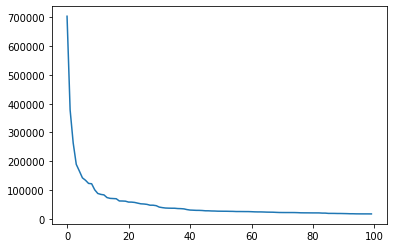

In [69]:
plt.plot(x,frequences)

In [70]:
import numpy as np

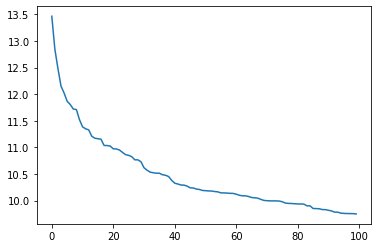

In [72]:
plt.plot(x,np.log(frequences))   ##数据样本足够大时，图像趋向于直线。

In [102]:
def prob(word):return words_count[word] / len(TOKEN)

In [87]:
prob('吃饭')

1.8832564745929585e-05

In [95]:
TOKEN = [str(t) for t in TOKEN]
TOKEN_2_grammar = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN)-2)]
TOKEN_2_grammar
words_count2 = Counter(TOKEN_2_grammar)
words_count2

Counter({'此外自': 7,
         '自本周': 2,
         '本周6': 3,
         '6月': 16915,
         '月12': 4305,
         '12日起': 8,
         '日起除': 1,
         '除小米': 1,
         '小米手机': 9,
         '手机6': 1,
         '6等': 1,
         '等15': 44,
         '15款': 5,
         '款机型': 2,
         '机型外': 1,
         '外其余': 53,
         '其余机型': 1,
         '机型已': 1,
         '已暂停': 12,
         '暂停更新': 1,
         '更新发布': 1,
         '发布含': 1,
         '含开发': 1,
         '开发版': 1,
         '版体验版': 1,
         '体验版内测': 1,
         '内测稳定版': 1,
         '稳定版暂不受': 1,
         '暂不受影响': 1,
         '影响以': 10,
         '以确保': 139,
         '确保工程师': 1,
         '工程师可以': 1,
         '可以集中': 5,
         '集中全部': 1,
         '全部精力': 10,
         '精力进行': 1,
         '进行系统优化': 1,
         '系统优化工作': 1,
         '工作有人': 3,
         '有人猜测': 5,
         '猜测这': 10,
         '这也': 1623,
         '也是': 7122,
         '是将': 174,
         '将精力': 12,
         '精力主要': 1,
         '主要用到': 1,
         '用到MIUI9': 1,
         'MIU

In [156]:

def prob2(w1,w2):
    if w1 + w2 in words_count2: return words_count2[w1+w2] / len(TOKEN_2_grammar)
    else:
        #return (prob(w1)+prob(w2)) / 2
        return 1 / len(TOKEN_2_grammar)

In [157]:
prob2('此外','吃')

5.7068384531568716e-08

In [158]:
prob2('吃','雪糕')

5.7068384531568716e-08

In [159]:
prob2('去','旅游')

5.136154607841184e-07

In [160]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_prob = 1
    
    for i,word in enumerate(words[:-1]):
        nextword = words[i+1]
        probability = prob2(word,nextword)
        sentence_prob *= probability
    return sentence_prob

In [162]:
get_probability('老陈明天凌晨收到一辆汽车')

2.832613533325974e-41

In [163]:
get_probability('汽水来一杯')

3.2568005130429914e-15

In [164]:
get_probability('洋葱奶昔来一杯')

1.858603440209477e-22

In [166]:
get_probability('养乐多绿来一杯')

3.2568005130429914e-15

In [172]:
for sen in [generate(gram=create_grammar(simple_grammar),target='sentence') for i in range(20)]:
    print('sentence:{} with prb {}'.format(sen,get_probability(sen)))

sentence:一个篮球听着一个桌子 with prb 4.0247066139520047e-33
sentence:一个好看的小猫听着这个女人 with prb 1.2190851428534954e-44
sentence:一个小小的篮球看着一个篮球 with prb 1.3316821402758927e-35
sentence:这个蓝色的好看的篮球看着这个小小的女人 with prb 7.655138259766106e-59
sentence:这个小猫坐在一个小猫 with prb 6.364049749054255e-29
sentence:这个好看的女人看见这个小小的小猫 with prb 8.346009500720187e-47
sentence:这个好看的桌子听着一个小猫 with prb 3.145839975639939e-45
sentence:这个小猫听着一个篮球 with prb 4.0247066139520047e-33
sentence:一个篮球看见这个小小的小猫 with prb 2.1791162295423696e-35
sentence:一个蓝色的桌子听着一个好看的小小的女人 with prb 5.846869001072888e-65
sentence:这个篮球看着一个篮球 with prb 1.0606749581757092e-29
sentence:这个蓝色的蓝色的好看的小猫坐在这个篮球 with prb 1.1396514100451894e-64
sentence:一个女人看见一个桌子 with prb 3.8184298494325536e-28
sentence:一个好看的女人看着一个小小的蓝色的好看的好看的好看的蓝色的女人 with prb 8.202753385931614e-107
sentence:这个小小的桌子听着一个蓝色的女人 with prb 1.6494135496547693e-50
sentence:这个桌子看见这个小小的小小的小小的蓝色的女人 with prb 1.1325536676586324e-60
sentence:这个小猫看着一个好看的篮球 with prb 7.627330099492377e-41
sentence:这个女人听着这个女人 with prb 4.8739

In [177]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for w in need_compared:
    w1,w2 = w.split()
    p1 = get_probability(w1)
    p2 = get_probability(w2)
    
    better = w1 if p1>p2 else w2
    
    
    print('{} is more possible'.format(better))
    print('-'*2 + ' {} with probility {}'.format(w1, p1))
    print('-'*2 + ' {} with probility {}'.format(w2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
-- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.9943899675790819e-66
-- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.5955119740632654e-66
真是一只好看的小猫 is more possible
-- 真事一只好看的小猫 with probility 4.648781289690389e-34
-- 真是一只好看的小猫 with probility 8.145983678789447e-27
今晚我去吃火锅 is more possible
-- 今晚我去吃火锅 with probility 3.457002398789628e-20
-- 今晚火锅去吃我 with probility 5.515509782513688e-28
养乐多绿来一杯 is more possible
-- 洋葱奶昔来一杯 with probility 1.858603440209477e-22
-- 养乐多绿来一杯 with probility 3.2568005130429914e-15
